In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import pearsonr
import statistics
import pandas as pd
from tabulate import tabulate
import math

In [3]:
data = pd.read_csv('/Users/srirambhimaraju/Downloads/ADI_CCU_measurements_ests_newcols_silvia.csv')
time_vals = data.get('hour')
sys_ref = data.get('ABPM_SYS')
dia_ref = data.get('ABPM_DIA')
sys_pred = data.get('pred_SYS')
dia_pred = data.get('pred_DIA')
datetime = data.get('datetime')
subject_num = data.get('subject')
start_time = 0
end_time = 8

In [571]:
def getStart(subjectNum):
    startVal = 0
    for i in range(len(subject_num)):
        if (subject_num[i] < subjectNum):
            startVal += 1
        else:
            break
    return startVal

In [572]:
def getNumReadings(subjectNum):
    count = 0
    for i in range(len(subject_num)):
        if (subject_num[i] == subjectNum):
            count += 1
        elif (subject_num[i] > subjectNum):
            break
    return count

In [573]:
def getTimeVals(subjectNum): 
    start_val = getStart(subjectNum)
    return np.array(time_vals[start_val:(start_val + getNumReadings(subjectNum))])

In [574]:
def getSystolicRef(subjectNum): 
    start_val = getStart(subjectNum)
    return np.array(sys_ref[start_val:(start_val + getNumReadings(subjectNum))])

In [575]:
def getDiastolicRef(subjectNum): 
    start_val = getStart(subjectNum)
    return np.array(dia_ref[start_val:(start_val + getNumReadings(subjectNum))])

In [576]:
def getSystolicPred(subjectNum): 
    start_val = getStart(subjectNum)
    return np.array(sys_pred[start_val:(start_val + getNumReadings(subjectNum))])

In [577]:
def getDiastolicPred(subjectNum): 
    start_val = getStart(subjectNum)
    return np.array(dia_pred[start_val:(start_val + getNumReadings(subjectNum))])

In [578]:
def getDateTimeStamp(subjectNum):
    start_val = getStart(subjectNum)
    return np.array(datetime[start_val:(start_val + getNumReadings(subjectNum))])

In [737]:
def generateSTDevDataSubjects():
    total_number_of_subjects = 30
    table_of_stdevs = {'Subject Number': [], 'Predicted Systolic STDev': [], 
                        'Reference Systolic STDev': [], 'Predicted Diastolic STDev': [], 
                        'Reference Diastolic STDev': []}
    for i in range(total_number_of_subjects):
        table_of_stdevs.get('Subject Number').append(i+1)
        table_of_stdevs.get('Predicted Systolic STDev').append(round(statistics.stdev(getSystolicPred(i+1)), 2))
        table_of_stdevs.get('Reference Systolic STDev').append(round(statistics.stdev(getSystolicRef(i + 1)), 2))
        table_of_stdevs.get('Predicted Diastolic STDev').append(round(statistics.stdev(getDiastolicPred(i + 1)), 2))
        table_of_stdevs.get('Reference Diastolic STDev').append(round(statistics.stdev(getDiastolicRef(i + 1)), 2))
    df_stdevs = pd.DataFrame(table_of_stdevs)
    df_stdevs.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/STDeviationData.xlsx', index=False)

In [751]:
def generateSTDevData(isDipping):
    total_number_of_subjects = 30
    table_of_stdevs = {'Mean Predicted Systolic STDev': [], 
                        'Mean Reference Systolic STDev': [], 'Mean Predicted Diastolic STDev': [], 
                        'Mean Reference Diastolic STDev': []}
    pred_sys_stdevs, ref_sys_stdevs, pred_dia_stdevs, ref_dia_stdevs = [], [], [], []
    saveLoc = None
    
    if (isDipping):
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/OverallDippingSTDeviationData.xlsx'
        for i in range(total_number_of_subjects):
            sys_arr = getDippingArrays(i+1, 'Systolic')
            dia_arr = getDippingArrays(i+1, 'Diastolic')
            if (len(sys_arr[0]) > 0):
                pred_sys_stdevs.append(statistics.stdev(sys_arr[1]))
                ref_sys_stdevs.append(statistics.stdev(sys_arr[0]))
                pred_dia_stdevs.append(statistics.stdev(dia_arr[1]))
                ref_dia_stdevs.append(statistics.stdev(dia_arr[0]))
    else:
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/OverallSTDeviationData.xlsx'
        for i in range(total_number_of_subjects):
            pred_sys_stdevs.append(round(statistics.stdev(getSystolicPred(i+1)), 2))
            ref_sys_stdevs.append(round(statistics.stdev(getSystolicRef(i+1)), 2))
            pred_dia_stdevs.append(round(statistics.stdev(getDiastolicPred(i+1)), 2))
            ref_dia_stdevs.append(round(statistics.stdev(getDiastolicRef(i+1)), 2))
            
    table_of_stdevs.get('Mean Predicted Systolic STDev').append(round(statistics.mean(pred_sys_stdevs), 2))
    table_of_stdevs.get('Mean Reference Systolic STDev').append(round(statistics.mean(ref_sys_stdevs), 2))
    table_of_stdevs.get('Mean Predicted Diastolic STDev').append(round(statistics.mean(pred_dia_stdevs), 2))
    table_of_stdevs.get('Mean Reference Diastolic STDev').append(round(statistics.mean(ref_dia_stdevs), 2))

    df_stdevs = pd.DataFrame(table_of_stdevs)
    df_stdevs.to_excel(saveLoc, index=False)

In [752]:
generateSTDevData(True)

In [341]:
def generateRawGraphs(start, end):
    for i in range(end - start + 1):
        x = getNumReadings(i+start)
        x_arr = []
        for n in range(x):
            x_arr.append(n+1)
        plt.plot(x_arr, getSystolicPred(i+start), label='Sys Predicted')
        plt.scatter(x_arr, getSystolicRef(i+start), label='Sys Reference')
        plt.plot(x_arr, getDiastolicPred(i+start), label='Dia Predicted')
        plt.scatter(x_arr, getDiastolicRef(i+start), label='Dia Reference')
        plt.title("Subject {} Reference vs Predicted BP".format(i+start))
        plt.xlabel('Time')
        plt.ylabel('Blood Pressure (mmHg)') 
        plt.legend(loc='center right')
        plt.savefig('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/RawGraphs_noncontinuous/Subject_{}_Raw_Data.png'
                   .format(i+start))
        plt.close()

In [342]:
generateRawGraphs(1, 30)

In [675]:
def bland_altman(subjectNum, bp_type, isDipping):
    differences = []
    pred_list = []
    ref_list = []
    means = [] 
    saveLoc = None
    if (isDipping):
        arr = getDippingArrays(subjectNum, bp_type)
        pred_list = arr[1]
        ref_list = arr[0]
        if (len(ref_list) == 0):
            return
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/BlandAltmanDippingGraphs/Subject_{}_{}_BlandAltman_Dipping_Data.png'.format(subjectNum, bp_type)
    else:
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/BlandAltmanGraphs/Subject_{}_{}_BlandAltman_Data.png'.format(subjectNum, bp_type)
        if (bp_type == 'Systolic'):
            pred_list = np.array(getSystolicPred(subjectNum))
            ref_list = np.array(getSystolicRef(subjectNum))
        else:
            pred_list = np.array(getDiastolicPred(subjectNum))
            ref_list = np.array(getDiastolicRef(subjectNum))
    
    for i in range(len(pred_list)):
        differences.append(ref_list[i] - pred_list[i])
        means.append((ref_list[i] + pred_list[i])/2)
    
    mean_diff = statistics.mean(differences)
    stdev_diff = statistics.stdev(differences)
    lower_limit = mean_diff - (1.96 * stdev_diff)
    upper_limit = mean_diff + (1.96 * stdev_diff)
    
    outside_limits_count = 0
    for i in range(len(differences)):
        if (differences[i] > upper_limit or differences[i] < lower_limit):
            outside_limits_count += 1
    
    if (outside_limits_count == 1):
        plt.figure().text(0.3, 0.15, '{} point outside limits of agreement'
                      .format(outside_limits_count))
    else:
        plt.figure().text(0.3, 0.15, '{} points outside limits of agreement'
                      .format(outside_limits_count)) 
    
    ax2 = plt.axes()
    ax2.axhline(mean_diff, color='red', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "mean diff")
    ax2.axhline(lower_limit, color='blue', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "lower lim")
    ax2.axhline(upper_limit, color='green', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "upper lim")
    plt.scatter(means, differences)
    plt.title("Subject {} Bland-Altman Plot".format(subjectNum))
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference Between Measurements') 
    plt.legend(loc='lower right')
    plt.savefig(saveLoc)
    plt.close()

In [676]:
def generateBlandAltmanGraphs(start, end):
    for i in range(end - start + 1):
        bland_altman(i+start, 'Systolic', True)
        bland_altman(i+start, 'Diastolic', True)

In [677]:
generateBlandAltmanGraphs(1, 30)

In [229]:
def dataWithinXSTDevs(data, num_stdevs):
    stdev_data = statistics.stdev(data)
    mean_data = statistics.mean(data)
    lower_bound = mean_data - num_stdevs * stdev_data
    upper_bound = mean_data + num_stdevs * stdev_data
    count = 0
    for i in range(len(data)):
        if (data[i] >= lower_bound and data[i] <= upper_bound):
            count += 1
    percent_data = ((count*1.0)/len(data)) * 100.0
    return "{}%".format(round(percent_data, 2))

In [685]:
def getNormality(subjectNum, bp_type, isDipping):
    differences = []
    pred_list = []
    ref_list = []
    if (isDipping):
        arr = getDippingArrays(subjectNum, bp_type)
        pred_list = arr[1]
        ref_list = arr[0]
        if (len(ref_list) == 0):
            return 'no dip'#potentially error yielding
    else:
        if (bp_type == 'Systolic'):
            pred_list = np.array(getSystolicPred(subjectNum))
            ref_list = np.array(getSystolicRef(subjectNum))
        else:
            pred_list = np.array(getDiastolicPred(subjectNum))
            ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        differences.append(ref_list[i] - pred_list[i])
        
    return [subjectNum, bp_type, round(statistics.mean(differences), 2), 
            dataWithinXSTDevs(differences, 1), dataWithinXSTDevs(differences, 2), 
            dataWithinXSTDevs(differences, 3)]

In [686]:
def generateNormalityData(isDipping):
    sys_table = {'Subject Number': [], 'BP Type': [], 'Mean': [], 'Data Within 1 STDev': [], 
                  'Data Within 2 STDev': [], 'Data Within 3 STDev': []}
    dia_table = {'Subject Number': [], 'BP Type': [], 'Mean': [], 'Data Within 1 STDev': [], 
                  'Data Within 2 STDev': [], 'Data Within 3 STDev': []}
    
    for i in range(30):
        arr_sys = getNormality(i+1, 'Systolic', isDipping) 
        if (arr_sys != 'no dip'):
            sys_table.get('Subject Number').append(arr_sys[0])
            sys_table.get('BP Type').append(arr_sys[1])
            sys_table.get('Mean').append(arr_sys[2])
            sys_table.get('Data Within 1 STDev').append(arr_sys[3])
            sys_table.get('Data Within 2 STDev').append(arr_sys[4])
            sys_table.get('Data Within 3 STDev').append(arr_sys[5])
    
        arr_dia = getNormality(i+1, 'Diastolic', isDipping) 
        if (arr_dia != 'no dip'):
            dia_table.get('Subject Number').append(arr_dia[0])
            dia_table.get('BP Type').append(arr_dia[1])
            dia_table.get('Mean').append(arr_dia[2])
            dia_table.get('Data Within 1 STDev').append(arr_dia[3])
            dia_table.get('Data Within 2 STDev').append(arr_dia[4])
            dia_table.get('Data Within 3 STDev').append(arr_dia[5])
    
    df_sys = pd.DataFrame(sys_table)
    df_dia = pd.DataFrame(dia_table)
    if (isDipping):
        df_sys.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/NormalityStatsSystolic.xlsx', index=False)
        df_dia.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/NormalityStatsDiastolic.xlsx', index=False)
    else:
        df_sys.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/NormalityStatsDippingSystolic.xlsx', index=False)
        df_dia.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/NormalityStatsDippingDiastolic.xlsx', index=False)

In [687]:
generateNormalityData(True)

In [244]:
def regression(subjectNum, bp_type):
    if (bp_type == 'Systolic'):
        plt.scatter(getSystolicRef(subjectNum), getSystolicPred(subjectNum))
    else:
        plt.scatter(getDiastolicRef(subjectNum), getDiastolicPred(subjectNum))
    plt.show()

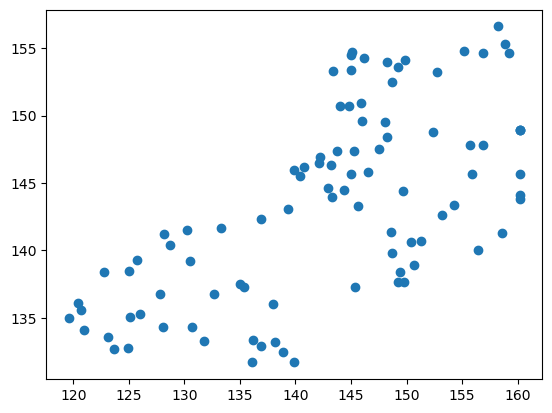

In [247]:
regression(1, 'Systolic')

In [728]:
def meanAbsoluteError(subjectNum, bp_type, isDipping):
    abs_differences = []
    pred_list = []
    ref_list = []
    if (subjectNum == 'overall'):
        if (isDipping):
            prarr = getFullDippingData(bp_type) #pred, ref
            pred_list = prarr[0]
            ref_list = prarr[1]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(sys_pred)
                ref_list = np.array(sys_ref)
            else:
                pred_list = np.array(dia_pred)
                ref_list = np.array(dia_ref)
    else:
        if (isDipping):
            arr = getDippingArrays(subjectNum, bp_type)
            pred_arr = arr[1]
            ref_arr = arr[0]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(getSystolicPred(subjectNum))
                ref_list = np.array(getSystolicRef(subjectNum))
            else:
                pred_list = np.array(getDiastolicPred(subjectNum))
                ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        abs_differences.append(abs(ref_list[i] - pred_list[i]))
    abs_differences_arr = np.array(abs_differences)  
    return round(statistics.mean(abs_differences_arr), 2)

In [733]:
def meanError(subjectNum, bp_type, isDipping):
    differences = []
    pred_list = []
    ref_list = []
    if (subjectNum == 'overall'):
        if (isDipping):
            prarr = getFullDippingData(bp_type) #pred, ref
            pred_list = prarr[0]
            ref_list = prarr[1]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(sys_pred)
                ref_list = np.array(sys_ref)
            else:
                pred_list = np.array(dia_pred)
                ref_list = np.array(dia_ref)
    else:
        if (isDipping):
            arr = getDippingArrays(subjectNum, bp_type)
            pred_arr = arr[1]
            ref_arr = arr[0]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(getSystolicPred(subjectNum))
                ref_list = np.array(getSystolicRef(subjectNum))
            else:
                pred_list = np.array(getDiastolicPred(subjectNum))
                ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        differences.append(ref_list[i] - pred_list[i])
    differences_arr = np.array(differences)  
    return round(statistics.mean(differences_arr), 2)

In [729]:
def rootMeanSquaredError(subjectNum, bp_type, isDipping):
    sq_differences = []
    pred_list = []
    ref_list = []
    if (subjectNum == 'overall'):
        if (isDipping):
            prarr = getFullDippingData(bp_type) #pred, ref
            pred_list = prarr[0]
            ref_list = prarr[1]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(sys_pred)
                ref_list = np.array(sys_ref)
            else:
                pred_list = np.array(dia_pred)
                ref_list = np.array(dia_ref)
    else:
        if (isDipping):
            arr = getDippingArrays(subjectNum, bp_type)
            pred_arr = arr[1]
            ref_arr = arr[0]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(getSystolicPred(subjectNum))
                ref_list = np.array(getSystolicRef(subjectNum))
            else:
                pred_list = np.array(getDiastolicPred(subjectNum))
                ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        sq_differences.append((ref_list[i] - pred_list[i]) ** 2)
    sq_differences_arr = np.array(sq_differences)
    return round(math.sqrt(statistics.mean(sq_differences_arr)), 2)

In [803]:
def meanAbsolutePercentageError(subjectNum, bp_type, isDipping):
    pct_differences = []
    pred_list = []
    ref_list = []
    if (subjectNum == 'overall'):
        if (isDipping):
            prarr = getFullDippingData(bp_type) #pred, ref
            pred_list = prarr[0]
            ref_list = prarr[1]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(sys_pred)
                ref_list = np.array(sys_ref)
            else:
                pred_list = np.array(dia_pred)
                ref_list = np.array(dia_ref)
    else:
        if (isDipping):
            arr = getDippingArrays(subjectNum, bp_type)
            pred_arr = arr[1]
            ref_arr = arr[0]
        else:
            if (bp_type == 'Systolic'):
                pred_list = np.array(getSystolicPred(subjectNum))
                ref_list = np.array(getSystolicRef(subjectNum))
            else:
                pred_list = np.array(getDiastolicPred(subjectNum))
                ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        pct_differences.append(100*(abs(ref_list[i] - pred_list[i])/ ref_list[i]))
    pct_differences_arr = np.array(pct_differences)
    return "{}".format(round(statistics.mean(pct_differences_arr)), 2)

In [815]:
def getNLowestValues(arr, n):
    local_arr = []
    for i in range(len(arr)):
        local_arr.append(arr[i])
    min_arr = []
    for i in range(n):
        min_index = local_arr.index(min(local_arr))
        min_arr.append(min_index + 1)
        local_arr[min_index] = 1000
    return min_arr

In [816]:
def getNHighestValues(arr, n):
    local_arr = []
    for i in range(len(arr)):
        local_arr.append(arr[i])
    max_arr = []
    for i in range(n):
        max_index = local_arr.index(max(local_arr))
        max_arr.append(max_index + 1)
        local_arr[max_index] = -1
    return max_arr

In [817]:
# objective: does the algo perform better for certain health statuses?

def generateMeanStats(domain, isDipping):
    MAE_arr = []
    MAPE_arr = []
    if (domain == 'overall'):
        overall_table = {'BP Type': [], 'Mean Error': [], 'Mean Absolute Error': [],
                     'Root Mean Squared Error': [], 'Mean Absolute Percentage Error': []}    
        overall_table.get('BP Type').append('Systolic')
        overall_table.get('Mean Error').append(meanError('overall', 'Systolic', isDipping))
        overall_table.get('Mean Absolute Error').append(meanAbsoluteError('overall', 'Systolic', isDipping))
        overall_table.get('Root Mean Squared Error').append(rootMeanSquaredError('overall', 'Systolic', isDipping))
        overall_table.get('Mean Absolute Percentage Error').append(meanAbsolutePercentageError('overall', 'Systolic', isDipping))

        overall_table.get('BP Type').append('Diastolic')
        overall_table.get('Mean Error').append(meanError('overall', 'Diastolic', isDipping))
        overall_table.get('Mean Absolute Error').append(meanAbsoluteError('overall', 'Diastolic', isDipping))
        overall_table.get('Root Mean Squared Error').append(rootMeanSquaredError('overall', 'Diastolic', isDipping))
        overall_table.get('Mean Absolute Percentage Error').append(meanAbsolutePercentageError('overall', 'Diastolic', isDipping))

        df_overall = pd.DataFrame(overall_table)
        if (isDipping):
            df_overall.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/DippingOverallMeanStats.xlsx', index=False)
        else:
            df_overall.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/OverallMeanStats.xlsx', index=False)
    else:
        sys_table = {'Subject Number': [], 'BP Type': [], 'Mean Error': [], 'Mean Absolute Error': [],
                     'Root Mean Squared Error': [], 'Mean Absolute Percentage Error': []}
        dia_table = {'Subject Number': [], 'BP Type': [], 'Mean Error': [], 'Mean Absolute Error': [],
                     'Root Mean Squared Error': [], 'Mean Absolute Percentage Error': []}
        for i in range(30):
            sys_table.get('Subject Number').append(i+1)
            sys_table.get('BP Type').append('Systolic')
            sys_table.get('Mean Error').append(meanError(i+1, 'Systolic', isDipping))
            sys_MAE = meanAbsoluteError(i+1, 'Systolic', isDipping)
            sys_table.get('Mean Absolute Error').append(sys_MAE)
            sys_table.get('Root Mean Squared Error').append(rootMeanSquaredError(i+1, 'Systolic', isDipping))
            sys_MAPE = meanAbsolutePercentageError(i+1, 'Systolic', isDipping)
            sys_table.get('Mean Absolute Percentage Error').append(sys_MAPE + "%")

            dia_table.get('Subject Number').append(i+1)
            dia_table.get('BP Type').append('Diastolic')
            dia_table.get('Mean Error').append(meanError(i+1, 'Diastolic', isDipping))
            dia_MAE = meanAbsoluteError(i+1, 'Diastolic', isDipping)
            dia_table.get('Mean Absolute Error').append(dia_MAE)
            dia_table.get('Root Mean Squared Error').append(rootMeanSquaredError(i+1, 'Diastolic', isDipping))
            dia_MAPE = meanAbsolutePercentageError(i+1, 'Diastolic', isDipping)
            dia_table.get('Mean Absolute Percentage Error').append(dia_MAPE + "%")
            
            MAE_arr.append((float(sys_MAE) + float(dia_MAE))/2.0)
            MAPE_arr.append((float(sys_MAPE) + float(dia_MAPE))/2.0)

        df_sys = pd.DataFrame(sys_table)
        df_dia = pd.DataFrame(dia_table)
        
        print("Subjects {} had the lowest MAE".format(getNLowestValues(MAE_arr, 5)))
        print("Subjects {} had the lowest MAPE".format(getNLowestValues(MAPE_arr, 5)))
        print("Subjects {} had the highest MAE".format(getNHighestValues(MAE_arr, 5)))
        print("Subjects {} had the highest MAPE".format(getNHighestValues(MAPE_arr, 5)))
        
        if (isDipping):
            df_sys.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/DippingMeanStatsSystolic.xlsx', index=False)
            df_dia.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/DippingMeanStatsDiastolic.xlsx', index=False) 
        else:
            df_sys.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/MeanStatsSystolic.xlsx', index=False)
            df_dia.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/MeanStatsDiastolic.xlsx', index=False)

In [818]:
generateMeanStats('by subject', False)

Subjects [3, 13, 16, 14, 24] had the lowest MAE
Subjects [3, 10, 13, 21, 23] had the lowest MAPE
Subjects [18, 27, 28, 22, 26] had the highest MAE
Subjects [18, 22, 26, 2, 9] had the highest MAPE


In [585]:
def differenceDistribution(subjectNum, bp_type):
    differences = []
    pred_list = []
    ref_list = []
    if (bp_type == 'Systolic'):
        pred_list = np.array(getSystolicPred(subjectNum))
        ref_list = np.array(getSystolicRef(subjectNum))
    else:
        pred_list = np.array(getDiastolicPred(subjectNum))
        ref_list = np.array(getDiastolicRef(subjectNum))

    for i in range(len(pred_list)):
        differences.append(ref_list[i] - pred_list[i])
    
    plt.axes().axhline(statistics.mean(differences), color='red', lw=2, alpha=0.7, 
            linestyle = "dashed", label = "Average Difference")
    plt.scatter(pred_list, differences)
    plt.title("Subject {} {} Spread Distribution".format(subjectNum, bp_type))
    plt.xlabel('Predicted Value')
    plt.ylabel('Difference Between Measurements')
    #plt.show()
    plt.savefig('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/DistributionSpread/Subject_{}_Distribution_Spread.png'
               .format(subjectNum))
    plt.close()

In [586]:
def generateDistributionSpread():
    for i in range(30):
        differenceDistribution(i+1, 'Systolic')
        differenceDistribution(i+1, 'Diastolic')

In [588]:
generateDistributionSpread()

In [477]:
# make predicted values a line, not scatter
# start somehow where the study starts, not at 0
def generateRawGraphsChronological():
    for i in range(30):
        x_values, sys_pred, sys_ref = getTimeVals(i+1), getSystolicPred(i+1), getSystolicRef(i+1)
        dia_pred, dia_ref = getDiastolicPred(i+1), getDiastolicRef(i+1)
        length = len(x_values)
        for z in range(length):
            min_val = min(x_values[z:length])
            min_index = z
            for n in range(length - z):
                if (x_values[n + z] == min_val):
                    min_index = n + z
            sptm, srtm, dptm, drtm = sys_pred[min_index], sys_ref[min_index], dia_pred[min_index], dia_ref[min_index]
            x_values[min_index], sys_pred[min_index], sys_ref[min_index], dia_pred[min_index], dia_ref[min_index]  = x_values[z], sys_pred[z], sys_ref[z], dia_pred[z], dia_ref[z]
            x_values[z], sys_pred[z], sys_ref[z], dia_pred[z], dia_ref[z] = min_val, sptm, srtm, dptm, drtm
            
        plt.scatter(x_values, sys_pred, label='Sys Predicted') #plot
        plt.scatter(x_values, sys_ref, label='Sys Reference')
        plt.scatter(x_values, dia_pred, label='Dia Predicted') #plot
        plt.scatter(x_values, dia_ref, label='Dia Reference')
        plt.title("Subject {} Reference vs Predicted BP".format(i+1))
        plt.xlabel('Time')
        plt.ylabel('Blood Pressure (mmHg)') 
        plt.legend(loc='center right')
        plt.savefig('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/RawGraphs_chronologicalT/Subject_{}_Raw_Data.png'
                   .format(i+1))
        plt.close()

In [478]:
generateRawGraphsChronological()

In [442]:
def dippingRange(subjectNum):
    times = np.array(getTimeVals(subjectNum))
    start_index = getStart(subjectNum)
    BP_in_domain = []
    for i in range(len(times)):
        if (times[i] >= start_time and times[i] <= end_time):
            BP_in_domain.append(sys_ref[i + start_index])
    if (len(BP_in_domain) == 0):
        return ['{}'.format(subjectNum), 'N/A', 'N/A']
    return [subjectNum, min(BP_in_domain), max(BP_in_domain)]

In [443]:
def generateDippingRanges():
    table = [['Subject Number', "Min Value", "Max Value"]]
    for i in range(30):
        table.append(dippingRange(i+1))
    print(tabulate(table))

In [445]:
### Ask Shay for the other datasets as well in addition to Kolkata (MIMIC-III Clinic Database)

In [762]:
def dippingGraph(subjectNum, bp_type):
    pred_list = []
    ref_list = []
    times = np.array(getTimeVals(subjectNum))
    if (bp_type == 'Systolic'):
        pred_list = np.array(getSystolicPred(subjectNum))
        ref_list = np.array(getSystolicRef(subjectNum))
    else:
        pred_list = np.array(getDiastolicPred(subjectNum))
        ref_list = np.array(getDiastolicRef(subjectNum))

    start_index = getStart(subjectNum)
    BP_pred_in_domain = []
    BP_ref_in_domain = []
    times_in_domain = []
    for i in range(len(times)):
        if (times[i] >= start_time and times[i] <= end_time):
            times_in_domain.append(times[i])
            BP_pred_in_domain.append(pred_list[i])
            BP_ref_in_domain.append(ref_list[i])
    
    if (len(times_in_domain) == 0):
        return ['N/A', 'N/A', 'N/A', 0, 'N/A']
        
    minpos = BP_ref_in_domain.index(min(BP_ref_in_domain))    
    if (len(BP_ref_in_domain) - minpos <= 10):
        minpos = 0
    maxpos = BP_ref_in_domain.index(max(BP_ref_in_domain[minpos:])) + 1
    BP_ref_in_domain = BP_ref_in_domain[minpos:maxpos]
    BP_ref_in_domain = np.array(BP_ref_in_domain)
    BP_pred_in_domain = BP_pred_in_domain[minpos:maxpos]
    BP_pred_in_domain = np.array(BP_pred_in_domain)
    times_in_domain = times_in_domain[minpos:maxpos]
    times_in_domain = np.array(times_in_domain)
    slope_ref = 'N/A' #may give an error
    slope_pred = 'N/A'
    plt.title("Subject {} Dipping Period Reference vs Predicted BP".format(subjectNum))
    plt.xlabel('Time')
    plt.ylabel('Blood Pressure (mmHg)') 
    if (len(BP_pred_in_domain) <= 3):
        return ['N/A', 'N/A', 'N/A', 0, 'N/A']
    else:
        plt.scatter(times_in_domain, BP_pred_in_domain, label='Predicted') #plot
        plt.scatter(times_in_domain, BP_ref_in_domain, label='Reference')
        m, b = np.polyfit(times_in_domain, BP_ref_in_domain, 1)
        slope_ref = m
        m1, b1 = np.polyfit(times_in_domain, BP_pred_in_domain, 1)
        slope_pred = m1
        plt.plot(times_in_domain, m*times_in_domain+b)
        plt.plot(times_in_domain, m1*times_in_domain+b1)
        plt.savefig('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/DippingGraphs/Subject_{}_{}_Dipping.png'
              .format(subjectNum, bp_type))
        plt.close()
        start = times_in_domain[0]
        end = times_in_domain[len(times_in_domain)-1]
        return [slope_ref, start, end, len(times_in_domain), slope_pred] #slope ref, start time, end time, # of datapoints, slope pred

In [782]:
def generateDippingGraphStats(isOverall):
    dipping_table_sys = {'Subject Number': [], 'Reference Slope (Dipping Strength)': [], 
                     'Predicted Slope (Dipping Strength)': [], '# of Datapoints': []}
    dipping_table_dia = {'Subject Number': [], 'Reference Slope (Dipping Strength)': [], 
                     'Predicted Slope (Dipping Strength)': [], '# of Datapoints': []}
    
    dipping_overall = {'Systolic Reference Slope (Dipping Strength)': [],
                      'Systolic Predicted Slope (Dipping Strength)': [],
                      'Diastolic Reference Slope (Dipping Strength)': [],
                      'Diastolic Predicted Slope (Dipping Strength)': [],}
    
    sys_subject_nums, sys_ref_slopes, sys_pred_slopes, sys_num_data = [],[],[],[]
    dia_subject_nums, dia_ref_slopes, dia_pred_slopes, dia_num_data = [],[],[],[]
    for i in range(30):
        sys_arr = dippingGraph(i+1, 'Systolic')
        if ((sys_arr[0] != 'N/A') or (isOverall == False)):
            sys_subject_nums.append(i+1)
            sys_ref_slopes.append(sys_arr[0])
            sys_pred_slopes.append(sys_arr[4])
            sys_num_data.append(sys_arr[3])

            dia_arr = dippingGraph(i+1, 'Diastolic')
            dia_subject_nums.append(i+1)
            dia_ref_slopes.append(dia_arr[0])
            dia_pred_slopes.append(dia_arr[4])
            dia_num_data.append(dia_arr[3])
        
    if (isOverall):
        dipping_overall.get('Systolic Reference Slope (Dipping Strength)').append(statistics.mean(sys_ref_slopes))
        dipping_overall.get('Systolic Predicted Slope (Dipping Strength)').append(statistics.mean(sys_pred_slopes))
        dipping_overall.get('Diastolic Reference Slope (Dipping Strength)').append(statistics.mean(dia_ref_slopes))
        dipping_overall.get('Diastolic Predicted Slope (Dipping Strength)').append(statistics.mean(dia_pred_slopes))
        ovrl_data = pd.DataFrame(dipping_overall)
        ovrl_data.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/DippingDataOVERALL.xlsx', index=False)
    else:
        for i in range(len(sys_subject_nums)):
            dipping_table_sys.get('Subject Number').append(sys_subject_nums[i])
            dipping_table_sys.get('Reference Slope (Dipping Strength)').append(sys_ref_slopes[i])
            dipping_table_sys.get('Predicted Slope (Dipping Strength)').append(sys_pred_slopes[i])
            dipping_table_sys.get('# of Datapoints').append(sys_num_data[i])
            
            dipping_table_dia.get('Subject Number').append(dia_subject_nums[i])
            dipping_table_dia.get('Reference Slope (Dipping Strength)').append(dia_ref_slopes[i])
            dipping_table_dia.get('Predicted Slope (Dipping Strength)').append(dia_pred_slopes[i])
            dipping_table_dia.get('# of Datapoints').append(dia_num_data[i])
        sys_data = pd.DataFrame(dipping_table_sys)
        sys_data.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/DippingDataSystolic.xlsx', index=False)
        dia_data = pd.DataFrame(dipping_table_dia)
        dia_data.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/DippingDataDiastolic.xlsx', index=False)

In [784]:
generateDippingGraphStats(False)

In [674]:
# returns [reference BPs, predicted BPs, times]
def getDippingArrays(subjectNum, bp_type):
    ref_list = None
    if (bp_type == 'Systolic'):
        ref_list = np.array(getSystolicRef(subjectNum))
    else:
        ref_list = np.array(getDiastolicRef(subjectNum))
    times = np.array(getTimeVals(subjectNum))

    start_index = getStart(subjectNum)
    BP_ref_in_domain = []
    times_in_domain = []
    for i in range(len(times)):
        if (times[i] >= start_time and times[i] <= end_time):
            times_in_domain.append(times[i])
            BP_ref_in_domain.append(ref_list[i])
    
    if (len(times_in_domain) == 0):
        return [[], [], []]
        
    minpos = BP_ref_in_domain.index(min(BP_ref_in_domain))    
    if (len(BP_ref_in_domain) - minpos <= 10):
        minpos = 0
    maxpos = BP_ref_in_domain.index(max(BP_ref_in_domain[minpos:])) + 1
    BP_ref_in_domain = BP_ref_in_domain[minpos:maxpos]
    BP_ref_in_domain = np.array(BP_ref_in_domain)
    times_in_domain = times_in_domain[minpos:maxpos]
    times_in_domain = np.array(times_in_domain)
    if (len(times_in_domain) < 2):
        return [[], [], []]
    overall_start = start_index+minpos
    overall_end = start_index+maxpos
    if (bp_type == 'Systolic'):
        return[BP_ref_in_domain, np.array(sys_pred[overall_start:overall_end]), times_in_domain]
    else:
        return[BP_ref_in_domain, np.array(dia_pred[overall_start:overall_end]), times_in_domain]

In [ ]:
# generate all dipping stats
# finish converting all methods to include isDipping (note, 
# empty exception may have to be customized for each method)

In [716]:
def overall_bland_altman(bp_type, isDipping):
    differences = []
    pred_list = []
    ref_list = []
    means = [] 
    saveLoc = None
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(4)
    if (isDipping):
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/Dipping/BlandAltmanDippingGraphs/Overall_Dipping_{}_BlandAltman_Data.png'.format(bp_type)
        prarr = getFullDippingData(bp_type) #pred, ref
        pred_list = prarr[0]
        ref_list = prarr[1]
    else:
        saveLoc = '/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/BlandAltmanGraphs/Overall_{}_BlandAltman_Data.png'.format(bp_type)
        if (bp_type == 'Systolic'):
            pred_list = sys_pred
            ref_list = sys_ref
        else:
            pred_list = dia_pred
            ref_list = dia_ref
    
    for i in range(len(pred_list)):
        differences.append(ref_list[i] - pred_list[i])
        means.append((ref_list[i] + pred_list[i])/2)
    
    mean_diff = statistics.mean(differences)
    stdev_diff = statistics.stdev(differences)
    lower_limit = mean_diff - (1.96 * stdev_diff)
    upper_limit = mean_diff + (1.96 * stdev_diff)
    
    outside_limits_count = 0
    for i in range(len(differences)):
        if (differences[i] > upper_limit or differences[i] < lower_limit):
            outside_limits_count += 1
    
    if (outside_limits_count == 1):
        f.text(0.3, 0.15, '{} point outside limits of agreement'
                      .format(outside_limits_count))
    else:
        f.text(0.3, 0.15, '{} points outside limits of agreement'
                      .format(outside_limits_count)) 
    
    ax2 = plt.axes()
    ax2.axhline(mean_diff, color='red', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "mean diff")
    ax2.axhline(lower_limit, color='blue', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "lower lim")
    ax2.axhline(upper_limit, color='green', lw=2, alpha=0.7, 
                linestyle = "dashed", label = "upper lim")
    plt.scatter(means, differences, s=1)
    if (isDipping):
        plt.title("Full Dataset Dipping {} Bland-Altman Plot".format(bp_type))
    else:
        plt.title("Full Dataset {} Bland-Altman Plot".format(bp_type))
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference Between Measurements') 
    plt.legend(loc='lower right')
    plt.savefig(saveLoc)
    plt.close()

In [ ]:
overall_bland_altman('Systolic', False)
overall_bland_altman('Diastolic', False)
overall_bland_altman('Systolic', True)
overall_bland_altman('Diastolic', True)

In [727]:
def getFullDippingData(bp_type):
    pred, ref = [], []
    for i in range(30):
        arr = getDippingArrays(i + 1, bp_type)
        pred_arr = arr[1]
        ref_arr = arr[0]
        for n in range(len(pred_arr)):
            pred.append(pred_arr[n])
        for n in range(len(ref_arr)):
            ref.append(ref_arr[n])   
    return [pred, ref]

In [39]:
# Pulse Shape attempt
def getConcavity(arr, index):
    if (arr[index + 1] < (arr[index] + arr[index+2])/2):
        return "CCU"
    else:
        return "CCD"
    
def concavitySummary(file_name):
    csv_file = pd.read_csv(file_name)
    data = np.array(csv_file.get('28'))
    concavity_arr = [[]]
    for i in range(0, (len(data) - 2), 2):
        concavity_arr.append([i+1, getConcavity(data, i)])
    return concavity_arr

def inflectionPoints(file_name):
    concavity_data = concavitySummary(file_name)
    inflection_indices = []
    for i in range(1, len(concavity_data) - 2):
        if ((concavity_data[i])[1] != (concavity_data[i+1])[1]):
            inflection_indices.append((concavity_data[i])[0] + 1)
    inflection_points = {'inflection points indices': inflection_indices}
    infl_pts_df = pd.DataFrame(inflection_points)
    infl_pts_df.to_excel('/Users/srirambhimaraju/Desktop/GTCardio Work/InflectionPoints.xlsx', index=False)
    
inflectionPoints('/Users/srirambhimaraju/Downloads/201804072009_RD-AEG1_001_070418.csv')

In [836]:
subject_profiles = pd.read_csv('/Users/srirambhimaraju/Desktop/GTCardio Work/KolkataStudy/TrackingSheet.csv')
ages = subject_profiles.get('Age')
genders = subject_profiles.get('Gender')
med_groups = subject_profiles.get('Med Group')
HbA1Cs = subject_profiles.get('HbA1C')
med_conditions = subject_profiles.get('Medical Conditions')
meds = subject_profiles.get('Medicines')

In [838]:
def overviewTable(subj_arr, data_profile):
    profiles_table = [['Subject', 'Age', 'Gender', 'Medical Group', 'HbA1C']]
    for i in range(len(subj_arr)):
        subj_num = subj_arr[i]
        profiles_table.append([subj_num, ages[subj_num], genders[subj_num], 
                               med_groups[subj_num], HbA1Cs[subj_num]])
    if (data_profile == 'lMAE'):
        print ('Lowest MAE')
    elif (data_profile == 'hMAE'):
        print ('Highest MAE')
    elif (data_profile == 'lMAPE'):
        print ('Lowest MAPE')
    else:
        print ('Highest MAPE')
    print(tabulate(profiles_table))
    
lowest_MAE = [3, 13, 16, 14, 24]
highest_MAE = [18, 27, 28, 22, 26]
lowest_MAPE = [3, 10, 13, 21, 23]
highest_MAPE = [18, 22, 26, 2, 9]

overviewTable(lowest_MAE, 'lMAE')
overviewTable(highest_MAE, 'hMAE')
overviewTable(lowest_MAPE, 'lMAPE')
overviewTable(highest_MAPE, 'hMAPE')

Lowest MAE
-------  ---  ------  -------------  -----
Subject  Age  Gender  Medical Group  HbA1C
3        76   Female  H              5.6
13       73   Male    HD             6.8
16       64   Male    H              5.5
14       67   Male    HD             6.8
24       52   Female  H              6.5
-------  ---  ------  -------------  -----
Highest MAE
-------  ---  ------  -------------  -----
Subject  Age  Gender  Medical Group  HbA1C
18       41   Male    HPD            6.5
27       59   Male    HD             9.7
28       41   Male    HD             6.5
22       38   Male    H              5.6
26       69   Male    HD             6.4
-------  ---  ------  -------------  -----
Lowest MAPE
-------  ---  ------  -------------  -----
Subject  Age  Gender  Medical Group  HbA1C
3        76   Female  H              5.6
10       72   Male    HD             6.9
13       73   Male    HD             6.8
21       36   Male    HD             8
23       55   Male    HD             6.4
------- 